In [2]:
# import basic package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import datetime
import sklearn
import scipy

## 1. Read data from csv file

In [3]:
# import dataset
train_df = pd.read_csv('train_CloudCondition.csv')
train_df.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [4]:
train_df.shape

(71428, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         71428 non-null  int64  
 1   Cloud_Condition             71428 non-null  object 
 2   Rain_OR_SNOW                71313 non-null  object 
 3   Temperature (C)             71176 non-null  object 
 4   Apparent Temperature (C)    71425 non-null  float64
 5   Humidity                    71427 non-null  float64
 6   Wind Speed (km/h)           71426 non-null  float64
 7   Wind Bearing (degrees)      71391 non-null  float64
 8   Visibility (km)             71408 non-null  float64
 9   Pressure (millibars)        71363 non-null  float64
 10  Condensation                71428 non-null  object 
 11  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 6.5+ MB


for i in train_df.columns:
    print("*******************", i , "***************************")
    print()
    print(set(train_df[i].tolist()))
    print()

In [7]:
## Get numerical and categorical features
numerical_features = train_df.dtypes[train_df.dtypes != "object"].index
categorical_features = train_df.dtypes[train_df.dtypes == "object"].index
print('numerical_features: ',numerical_features)
print('categorical_features: ',categorical_features)

numerical_features:  Index(['Day', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Solar irradiance intensity'],
      dtype='object')
categorical_features:  Index(['Cloud_Condition', 'Rain_OR_SNOW', 'Temperature (C)', 'Condensation'], dtype='object')


## 2. Visualization of Numerical features

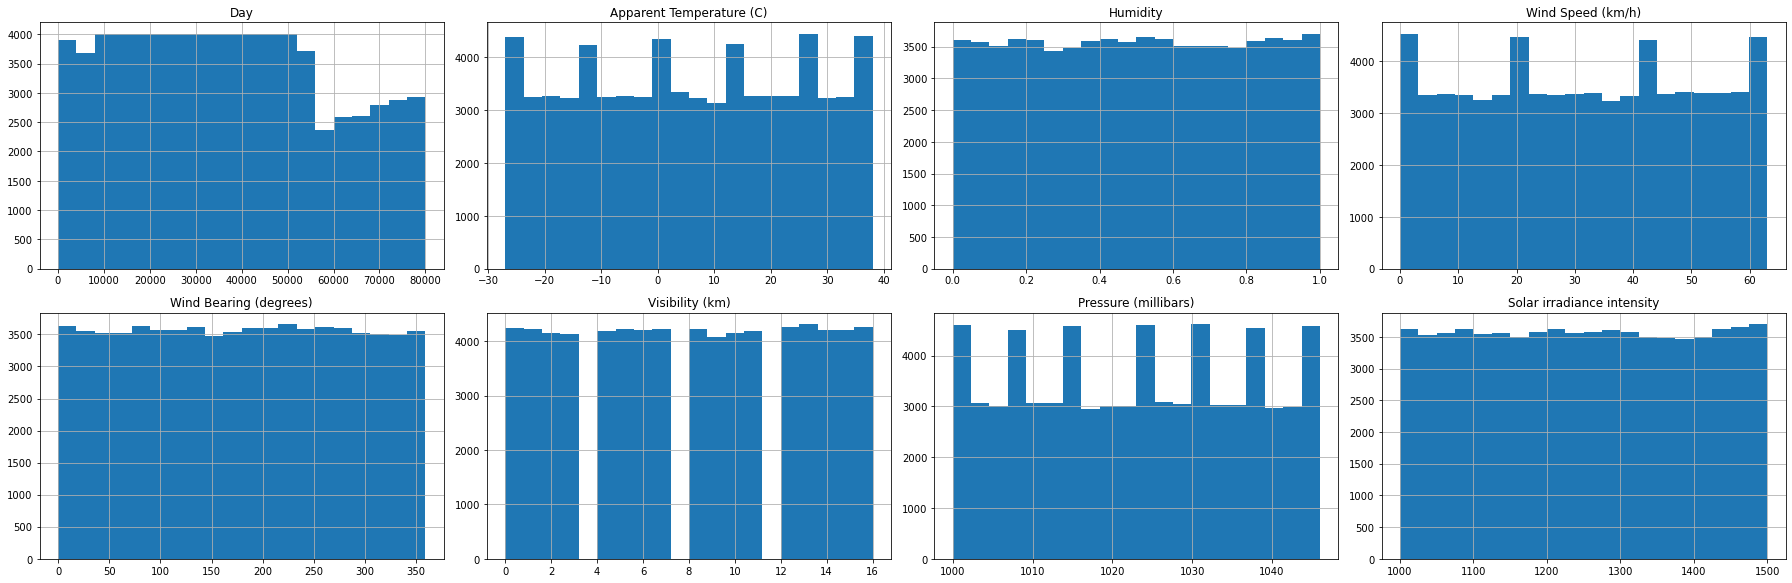

In [8]:
numerical_features=['Day', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Solar irradiance intensity']
plt.figure(figsize=(25,12))
n=np.arange(0,8,1)
data=train_df.copy()
for i,k in zip(numerical_features,n):
    plt.subplot(3,4,k+1)
    data[i].hist(bins=20)
    plt.title(numerical_features[k])
    plt.tight_layout()

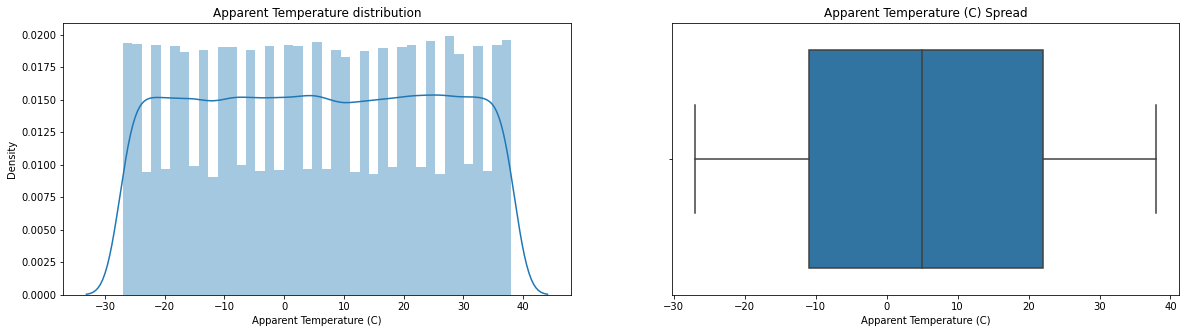

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Apparent Temperature distribution')
sns.distplot(data['Apparent Temperature (C)'])

plt.subplot(1,2,2)
plt.title('Apparent Temperature (C) Spread')
sns.boxplot(data['Apparent Temperature (C)'])
plt.show()

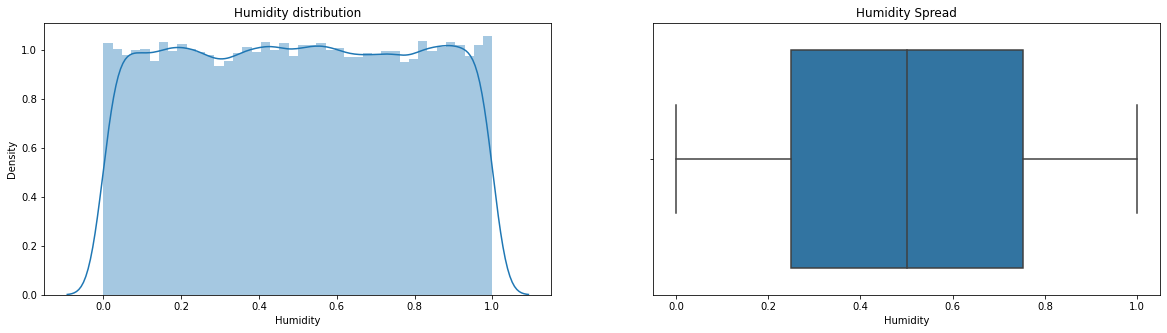

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Humidity distribution')
sns.distplot(data['Humidity'])

plt.subplot(1,2,2)
plt.title('Humidity Spread')
sns.boxplot(data['Humidity'])
plt.show()

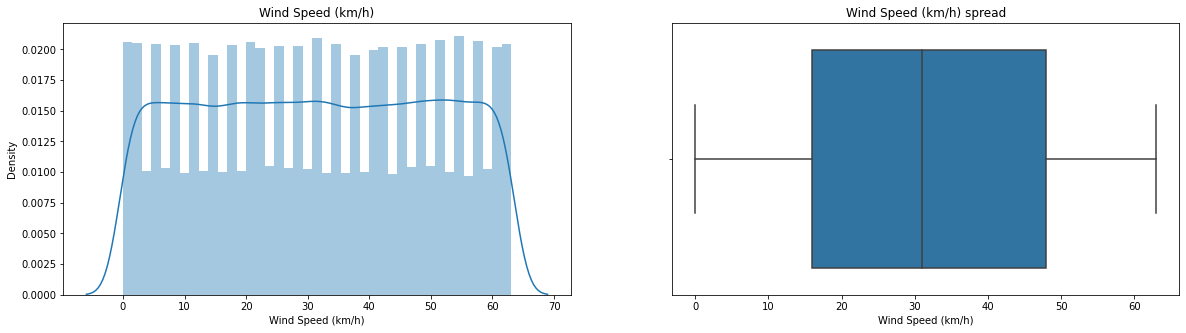

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Wind Speed (km/h)')
sns.distplot(data['Wind Speed (km/h)'])

plt.subplot(1,2,2)
plt.title('Wind Speed (km/h) spread')
sns.boxplot(data['Wind Speed (km/h)'])
plt.show()

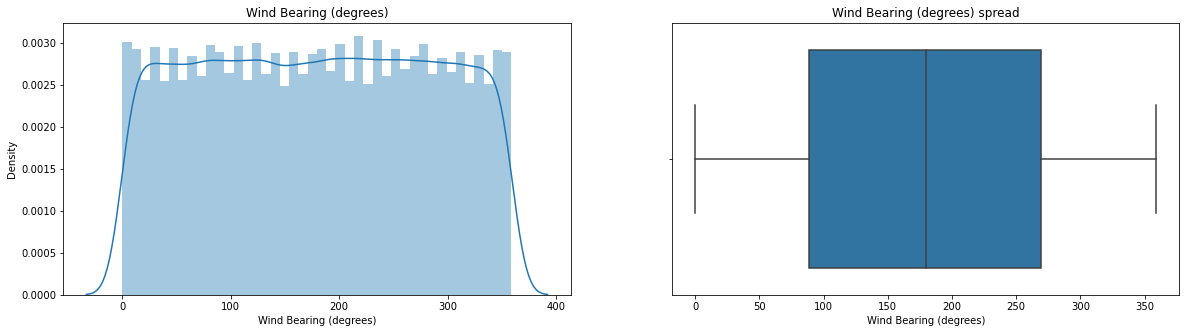

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Wind Bearing (degrees)')
sns.distplot(data['Wind Bearing (degrees)'])

plt.subplot(1,2,2)
plt.title('Wind Bearing (degrees) spread')
sns.boxplot(data['Wind Bearing (degrees)'])
plt.show()

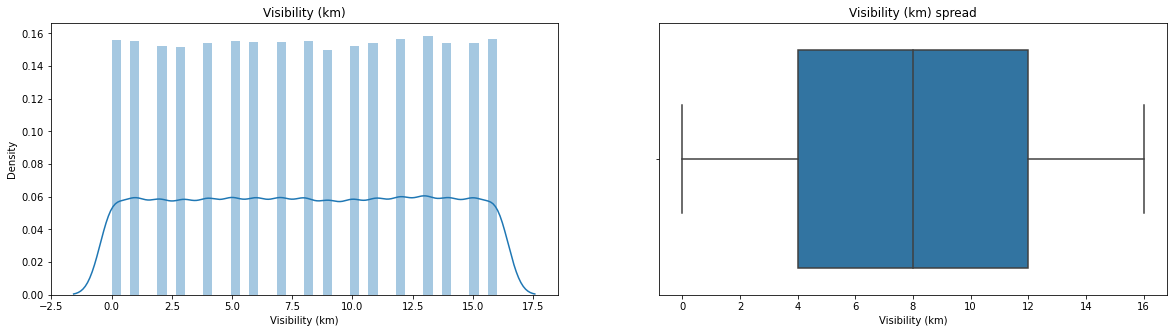

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Visibility (km)')
sns.distplot(data['Visibility (km)'])

plt.subplot(1,2,2)
plt.title('Visibility (km) spread')
sns.boxplot(data['Visibility (km)'])
plt.show()

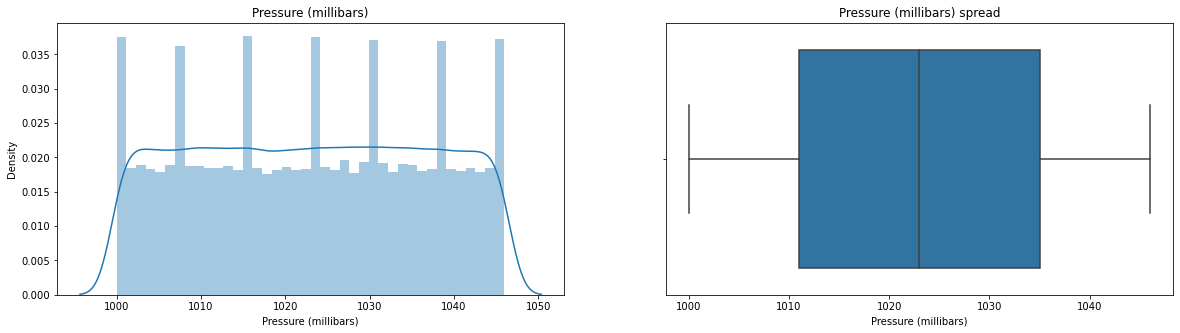

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Pressure (millibars)')
sns.distplot(data['Pressure (millibars)'])

plt.subplot(1,2,2)
plt.title('Pressure (millibars) spread')
sns.boxplot(data['Pressure (millibars)'])
plt.show()

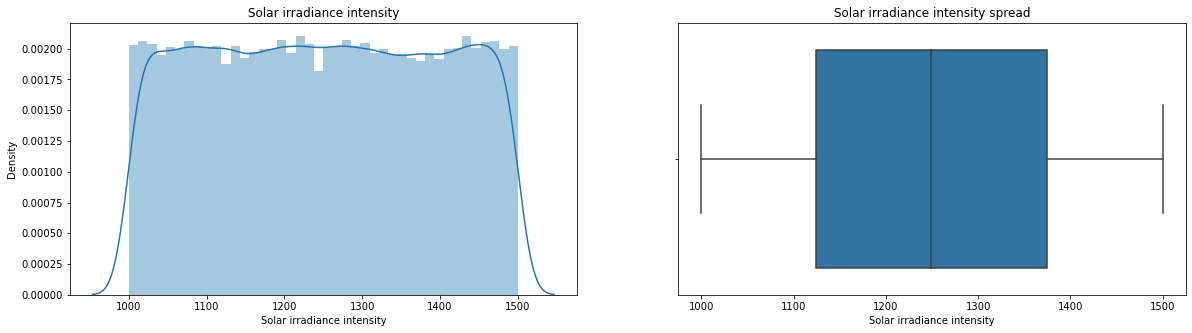

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Solar irradiance intensity')
sns.distplot(data['Solar irradiance intensity'])

plt.subplot(1,2,2)
plt.title('Solar irradiance intensity spread')
sns.boxplot(data['Solar irradiance intensity'])
plt.show()

In [16]:
data['Cloud_Condition'].value_counts(normalize=True)*100

Mostly Cloudy                          30.824047
Partly Cloudy                          24.658397
Overcast                               19.056952
Clear                                  13.606709
Foggy                                   8.260066
Breezy and Dry                          0.918407
Breezy and Mostly Cloudy                0.662205
Breezy and Overcast                     0.635605
Breezy and Partly Cloudy                0.490004
Light Rain                              0.299602
Dry and Partly Cloudy                   0.120401
Windy and Partly Cloudy                 0.088201
Breezy                                  0.063001
Windy and Overcast                      0.060200
Breezy and Foggy                        0.047600
Dry                                     0.047600
Humid and Mostly Cloudy                 0.044800
Windy and Mostly Cloudy                 0.044800
Humid and Partly Cloudy                 0.023800
Dry and Mostly Cloudy                   0.019600
Windy               

#### Conclusion :
There are only 4 categories which has highest probability for the cloud condition

In [17]:
data.groupby('Cloud_Condition').mean()

,Day,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
Cloud_Condition,,,,,,,,
Breezy,40939.511111,8.133333,0.557796,30.977778,181.844444,7.977778,1023.977778,1239.622222
Breezy and Dry,2270.931402,5.742378,0.510564,31.678354,178.893293,7.894656,1023.035385,1252.452744
Breezy and Foggy,47819.235294,9.264706,0.546845,30.176471,184.676471,7.147059,1025.264706,1220.647059
Breezy and Mostly Cloudy,42153.860465,5.558140,0.508919,31.866808,180.653277,7.883721,1023.386892,1247.114165
Breezy and Overcast,45095.370044,5.524229,0.505985,31.361233,179.385463,7.892070,1023.799559,1262.444934
Breezy and Partly Cloudy,36568.694286,6.608571,0.517068,31.842857,173.734286,7.651429,1023.680000,1236.862857
Clear,35844.028810,5.550468,0.498807,31.238115,178.918649,8.033460,1023.024624,1247.718901
Dangerously Windy and Partly Cloudy,12182.000000,14.000000,0.829716,59.000000,269.000000,11.000000,1041.000000,1043.000000
Drizzle,53981.200000,5.400000,0.192976,20.800000,175.000000,8.800000,1016.600000,1138.800000


#### conclusion :
Most Cloudy, partial Cloudy ,overcast has almost same values in all the columns this may conclude that the conditions are nearly the same 

<Figure size 2160x864 with 0 Axes>

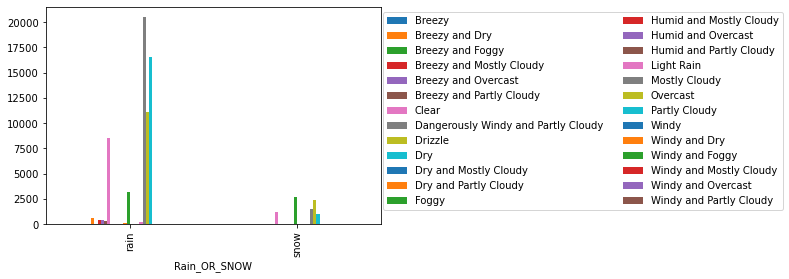

In [18]:
plt.figure(figsize=(30,12))
pd.crosstab(data['Rain_OR_SNOW'],data['Cloud_Condition']).plot(kind='bar')
plt.legend(bbox_to_anchor =(0.99, 1.0), ncol = 2)

### Conclusion :
Rain likely to be have more chances with cloud condition

<Figure size 2160x864 with 0 Axes>

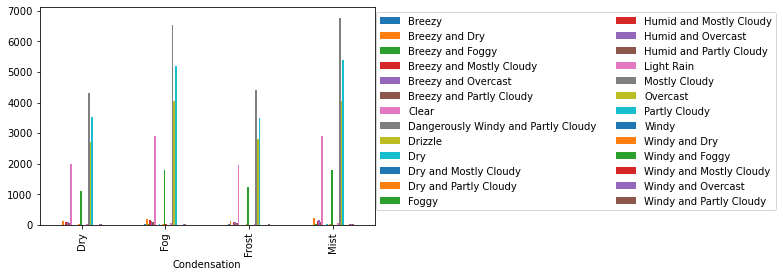

In [19]:
plt.figure(figsize=(30,12))
pd.crosstab(data['Condensation'],data['Cloud_Condition']).plot(kind='bar')
plt.legend(bbox_to_anchor =(0.99, 1.0), ncol = 2)

<Figure size 1800x432 with 0 Axes>

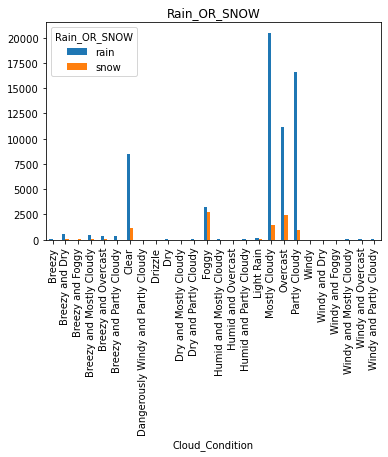

In [20]:
plt.figure(figsize=(25,6))
pd.crosstab(data.Cloud_Condition,data.Rain_OR_SNOW).plot(kind='bar')
plt.title('Rain_OR_SNOW')
plt.show()

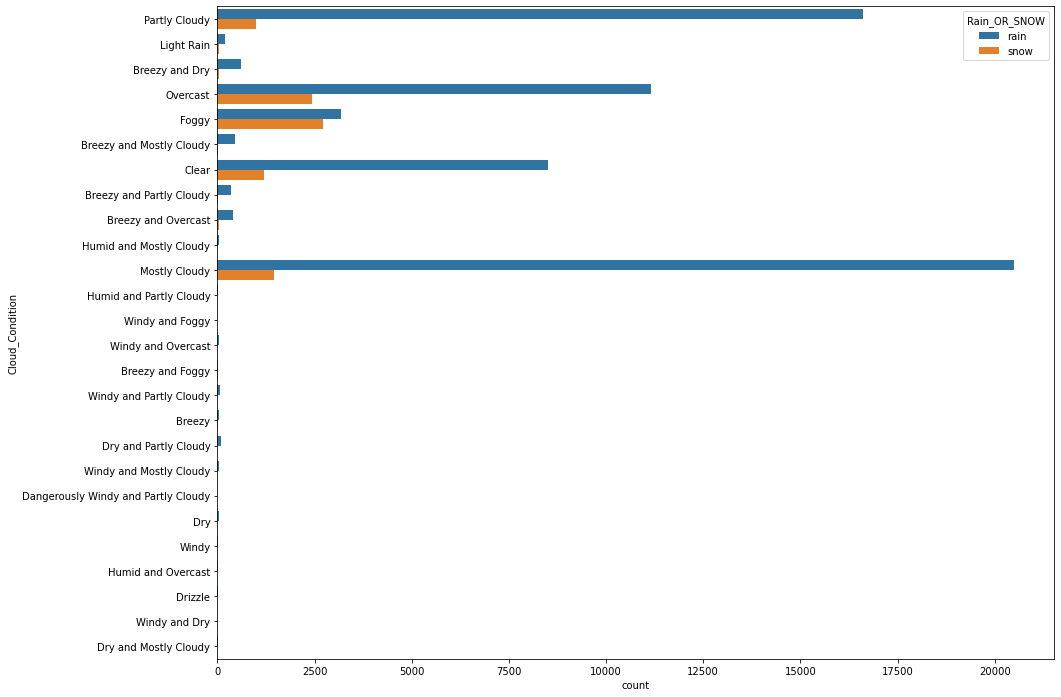

In [21]:
plt.figure(figsize=(15,12))
sns.countplot(y='Cloud_Condition',hue=data.Rain_OR_SNOW,data=data)
plt.show()

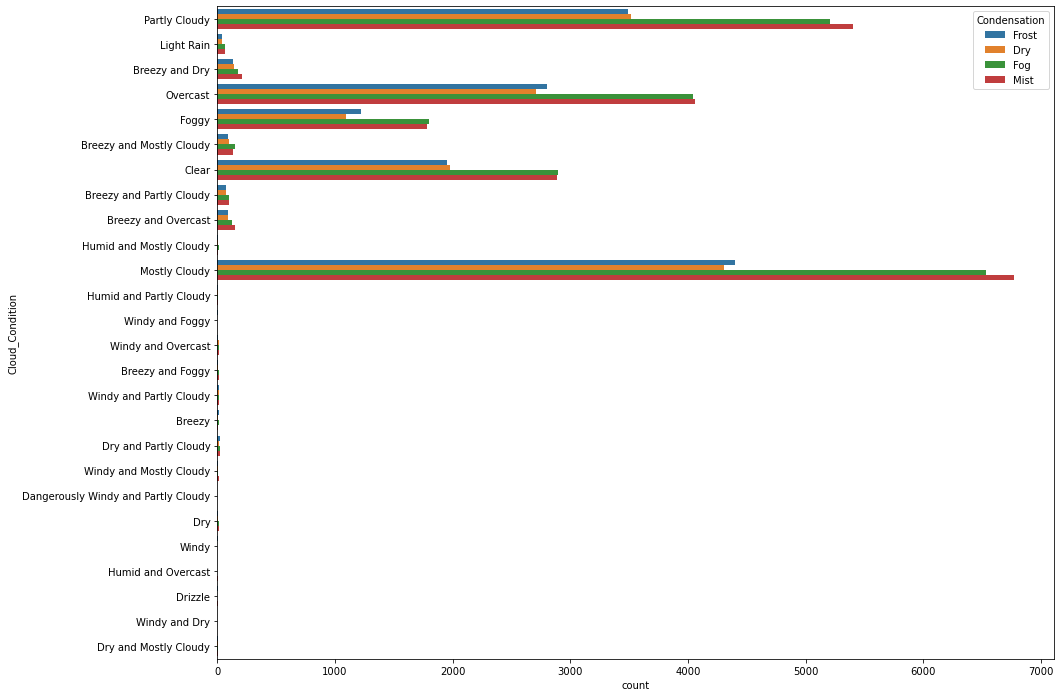

In [22]:
plt.figure(figsize=(15,12))
sns.countplot(y='Cloud_Condition',hue=data.Condensation,data=data)
plt.show()


### 3. Preprocessing and data cleaning

In [23]:
data.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               252
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [24]:

for feature in categorical_features:
    print(feature ," : ",round(data[feature].isnull().mean(),5))

Cloud_Condition  :  0.0
Rain_OR_SNOW  :  0.00161
Temperature (C)  :  0.00353
Condensation  :  0.0


In [25]:
for feature in numerical_features:
    print(feature ," : ",data[feature].isnull().mean())

Day  :  0.0
Apparent Temperature (C)  :  4.200033600268802e-05
Humidity  :  1.4000112000896008e-05
Wind Speed (km/h)  :  2.8000224001792016e-05
Wind Bearing (degrees)  :  0.0005180041440331522
Visibility (km)  :  0.00028000224001792015
Pressure (millibars)  :  0.0009100072800582405
Solar irradiance intensity  :  0.0


In [26]:
null_feature = [ feature for feature in data.columns if data[feature].isnull().sum()>0]
null_feature

['Rain_OR_SNOW',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [27]:
data['Temperature (C)'].unique()

array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '3', '29', '-8', '-15', '-20', '36', '32', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
       '12', '14', '1', '8', '-3', '38', '5', '37', '-10', '19', '34',
       '26', '0', '24', '11', '21', '-9', '-2', '4', '-19', '-6', '2',
       '-16', '-11', '18', '31', '-18', '-12', nan, '-', 16, 30, 17, -13,
       36, 4, 9, 10, 13, 27, -8, -16, 34, 2, -11, -9, -10, -5, 39, 14, 7,
       20, -3, 15, 24, 35, 25, -12, 26, -14, 19, 5, 38, -4, -17, 0, 8, 21,
       -20, -21, 37, 22, 11, 28, 12, -18, 29, 1, -2, -7, -6, 33, 3, 32,
       -1, 6, -15, 18, 23, 31, -19], dtype=object)

In [28]:
data['Temperature (C)'].replace("-",np.nan, inplace=True)

In [29]:
data['Temperature (C)'].unique()

array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '3', '29', '-8', '-15', '-20', '36', '32', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
       '12', '14', '1', '8', '-3', '38', '5', '37', '-10', '19', '34',
       '26', '0', '24', '11', '21', '-9', '-2', '4', '-19', '-6', '2',
       '-16', '-11', '18', '31', '-18', '-12', nan, 16, 30, 17, -13, 36,
       4, 9, 10, 13, 27, -8, -16, 34, 2, -11, -9, -10, -5, 39, 14, 7, 20,
       -3, 15, 24, 35, 25, -12, 26, -14, 19, 5, 38, -4, -17, 0, 8, 21,
       -20, -21, 37, 22, 11, 28, 12, -18, 29, 1, -2, -7, -6, 33, 3, 32,
       -1, 6, -15, 18, 23, 31, -19], dtype=object)

In [30]:
data.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               253
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [31]:
data = data.astype({'Temperature (C)': 'float64'})

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         71428 non-null  int64  
 1   Cloud_Condition             71428 non-null  object 
 2   Rain_OR_SNOW                71313 non-null  object 
 3   Temperature (C)             71175 non-null  float64
 4   Apparent Temperature (C)    71425 non-null  float64
 5   Humidity                    71427 non-null  float64
 6   Wind Speed (km/h)           71426 non-null  float64
 7   Wind Bearing (degrees)      71391 non-null  float64
 8   Visibility (km)             71408 non-null  float64
 9   Pressure (millibars)        71363 non-null  float64
 10  Condensation                71428 non-null  object 
 11  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 6.5+ MB


In [33]:
null_feature

['Rain_OR_SNOW',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [34]:
data['Rain_OR_SNOW'].value_counts(normalize=True)

rain    0.873838
snow    0.126162
Name: Rain_OR_SNOW, dtype: float64

In [35]:
data['Rain_OR_SNOW'].fillna('rain', inplace=True)

In [36]:
data.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                    0
Temperature (C)               253
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [37]:
# fill numerical missing value with median 
data.fillna(data.median(),inplace=True)

In [38]:
data.isnull().sum()

Day                           0
Cloud_Condition               0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [39]:
data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


<AxesSubplot:>

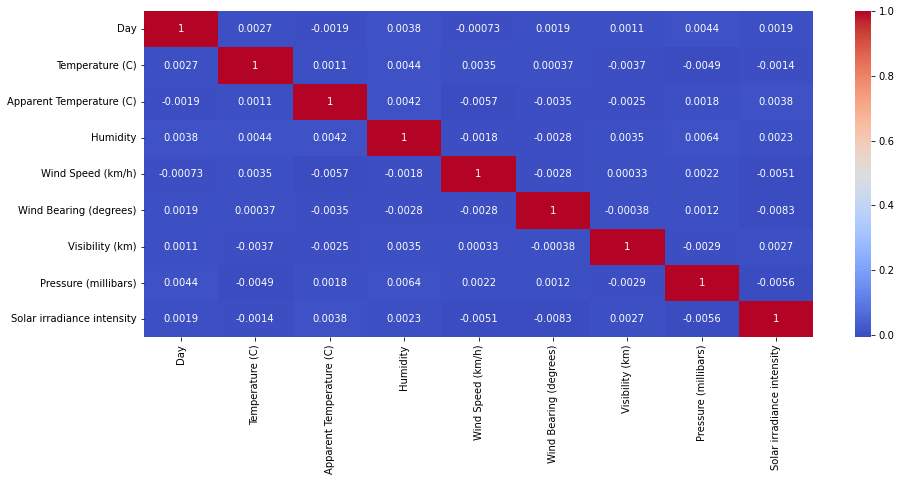

In [40]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### Conclusion :
there is no multicolinearity  

In [45]:
df=data.copy()
df.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


<AxesSubplot:>

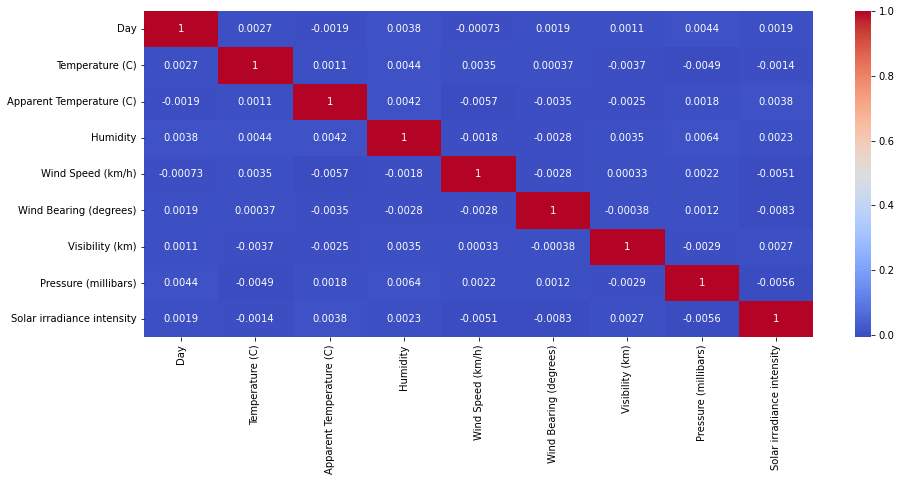

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### 4. Label Encoding

In [47]:
df['Rain_OR_SNOW'].value_counts()

rain    62431
snow     8997
Name: Rain_OR_SNOW, dtype: int64

In [48]:
df['Condensation'].value_counts()

Mist     21685
Fog      21222
Frost    14394
Dry      14127
Name: Condensation, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Rain_OR_SNOW']=encoder.fit_transform(df['Rain_OR_SNOW'])


### 5. Dummay Variables

In [50]:
# Defining the map function for categorical features having category more then two
df=pd.get_dummies(df,columns=['Condensation'] ,drop_first=True)

In [51]:
df.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,1,Partly Cloudy,0,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,1068,0,1,0
1,2,Partly Cloudy,0,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,1291,0,1,0
2,3,Partly Cloudy,0,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,1433,0,0,0
3,4,Partly Cloudy,1,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,1410,0,0,0
4,5,Partly Cloudy,1,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,1391,1,0,0


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['Temperature (C)','Apparent Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)',
           'Pressure (millibars)','Solar irradiance intensity','Condensation_Fog','Condensation_Frost','Condensation_Mist']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [52]:
df.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,1,Partly Cloudy,0,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,1068,0,1,0
1,2,Partly Cloudy,0,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,1291,0,1,0
2,3,Partly Cloudy,0,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,1433,0,0,0
3,4,Partly Cloudy,1,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,1410,0,0,0
4,5,Partly Cloudy,1,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,1391,1,0,0


In [53]:
df.shape

(71428, 14)

In [54]:
### seperate data into x,y
df_train=df[~ df['Cloud_Condition'].isnull()]

df_test =df[df['Cloud_Condition'].isnull()]
df_test.drop('Cloud_Condition',axis=1,inplace=True)

In [55]:
x=df_train.drop(['Day','Cloud_Condition'],axis=1)
y=df_train.Cloud_Condition

In [56]:
# imbalanced dataset found
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [57]:
x_ros.shape,y_ros.shape

((572442, 12), (572442,))

In [58]:
y_ros.value_counts()

Partly Cloudy                          22017
Light Rain                             22017
Windy and Dry                          22017
Drizzle                                22017
Humid and Overcast                     22017
Windy                                  22017
Dry                                    22017
Dangerously Windy and Partly Cloudy    22017
Windy and Mostly Cloudy                22017
Dry and Partly Cloudy                  22017
Breezy                                 22017
Windy and Partly Cloudy                22017
Breezy and Foggy                       22017
Windy and Overcast                     22017
Windy and Foggy                        22017
Humid and Partly Cloudy                22017
Mostly Cloudy                          22017
Humid and Mostly Cloudy                22017
Breezy and Overcast                    22017
Breezy and Partly Cloudy               22017
Clear                                  22017
Breezy and Mostly Cloudy               22017
Foggy     

In [59]:
# Minmax

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [60]:
y_enc= LabelEncoder().fit_transform(y)

In [61]:
# Dimension Reduction - Pricipal component analysis
from sklearn.decomposition import PCA
pca = PCA(.95)
x_pca = pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)

# we have 95% variance of the component parameter
# 8 columns we need to have 95% varaince 

(572442, 12)
(572442, 11)


### 6. Model Building 

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size=0.60, random_state=101)
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((343465, 11), (343465,), (228977, 11), (228977,))

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,max_depth=19,n_jobs=4,max_samples=235000)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=19, max_samples=235000, n_estimators=1000,
                       n_jobs=4)

In [83]:
print (f'Random Forest Train Accuracy - : {rf_model.score(x_train,y_train):.3f}')
print (f'Random Forest Test Accuracy - : {rf_model.score(x_test,y_test):.3f}')

Random Forest Train Accuracy - : 0.969
Random Forest Test Accuracy - : 0.902
